<a href="https://colab.research.google.com/github/Murtaza-34/Murtaza-34/blob/main/Servo_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SERVO PREDICTION USINNG LINEAR REGRESSION

Get Understanding about Data Set
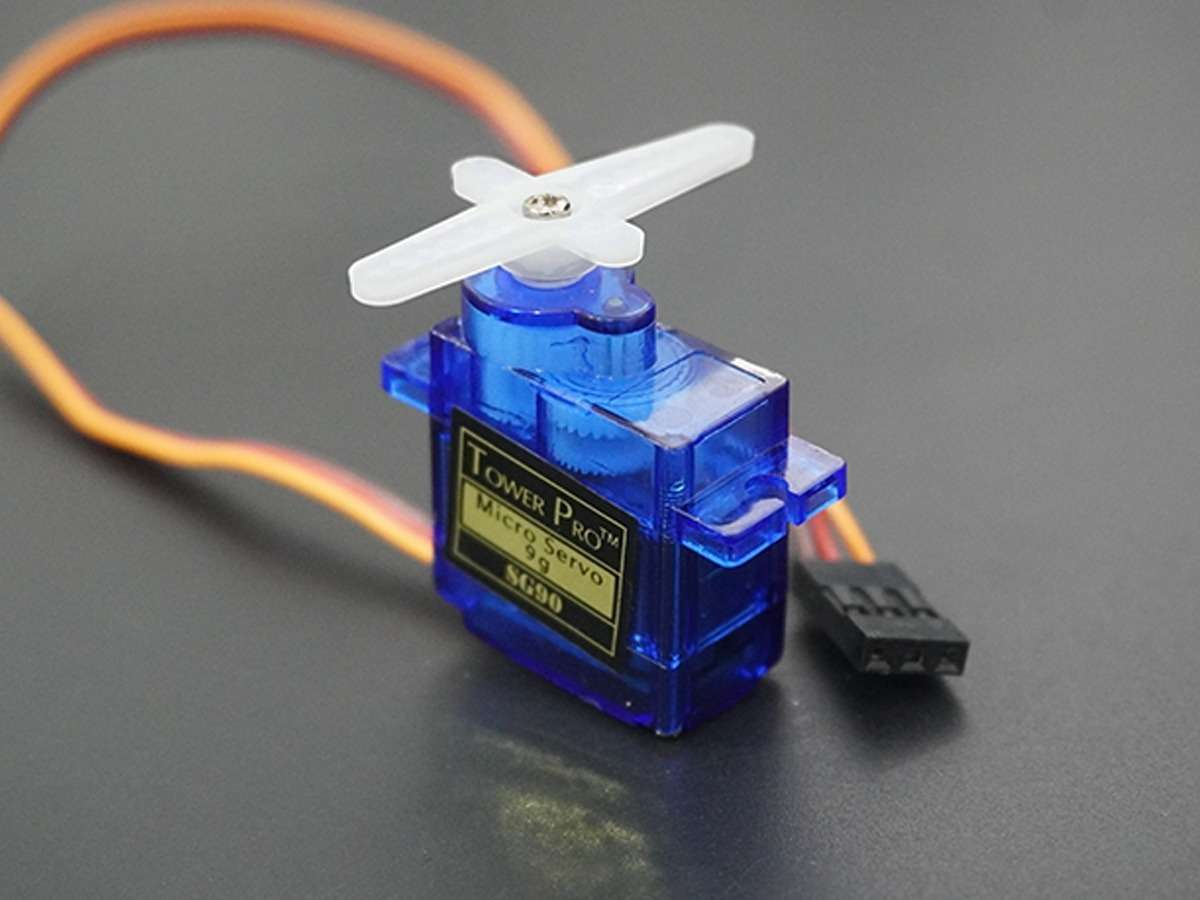

What is Servo: In control engineering a servomechanis, usually shortned to servo,is a type of electromechanical device used in various applications to control the position, speed, or movement of mechanical components. Servos are commonly used in robotics, automation systems, remote-controlled vehicles (such as RC cars and drones), and many other fields where precise and controlled motion is required.Servos are known for their accuracy and precision in controlling motion. They can be controlled using various methods, such as pulse-width modulation (PWM) signals, analog voltage, or digital communication protocols like PWM, I2C, or serial communication.

In summary, a servo is an electromechanical device that provides precise control over the position or speed of a mechanical component, making it an essential component in many applications requiring controlled motion.

1. Motor A,B,C,D,E
2. Screw A.B.C.D.E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10


  #Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

# Import CSV as DataFrame

In [3]:
df = pd.read_csv(r'https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

Get the Frist Five Rows of Dataframe

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


Get Information of DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Get the Summary Statistics

In [6]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


Get Column Names

In [7]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

Get Shape of DataFrame

In [9]:
df.shape

(167, 5)

Get Categories and Counts of Categorical Variables

In [11]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [12]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

Get Encoding of Categorical Features

In [14]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [15]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

Define Y and X

In [16]:
y = df['Class']

In [17]:
y.shape

(167,)

In [18]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [20]:
x = df [['Motor','Screw','Pgain','Vgain']]

In [21]:
x = df.drop('Class',axis=1)

In [23]:
x.shape

(167, 4)

In [25]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


Get Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=2529)

In [31]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

Get Model Train

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [35]:
lr.fit(x_train, y_train)

LinearRegression()

Get Model Prediction

In [36]:
y_pred = lr.predict(x_test)

In [37]:
y_pred.shape

(51,)

In [38]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

Get Model Evaluation

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [42]:
mean_absolute_error(y_test, y_pred)

7.190539677251235

In [43]:
r2_score(y_test,y_pred)

0.6807245170563927

Get Visualization of Actual Vs Predicted Results

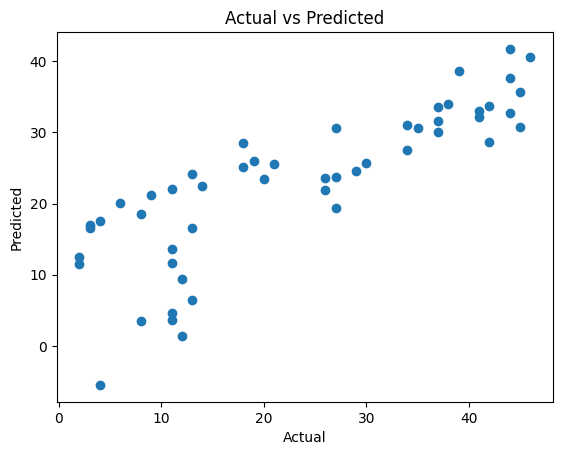

In [45]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Get Future Predictions

In [46]:
x_new = df.sample()

In [47]:
x_new

,Motor,Screw,Pgain,Vgain,Class
123,2,4,3,1,34


In [49]:
x_new.shape

(1, 5)

In [51]:
x_new = x_new.drop('Class', axis = 1)

In [52]:
x_new

,Motor,Screw,Pgain,Vgain
123,2,4,3,1


In [53]:
x_new.shape

(1, 4)

In [55]:
y_pred_new = lr.predict(x_new)

In [56]:
y_pred_new

array([24.06226694])